In [1]:
import pymongo
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bson.code import Code

In [2]:
mongo_connection = pymongo.MongoClient("localhost", 27017)
documents = mongo_connection.tiger.documents
# Loading our whole database to a list
bundle_list = list(
    documents.aggregate([
            {"$match" : {"yandexTranslationBody" : {"$exists" : True}}}
        ],allowDiskUse=True)
)

In [3]:
# Let's get the string for our titles and texts
str_text = ""
str_title = ""
nb_containing_bag = 0
for doc in bundle_list:
    str_text += doc["yandexTranslationBody"]
    str_title += doc["yandexTranslationTitle"]

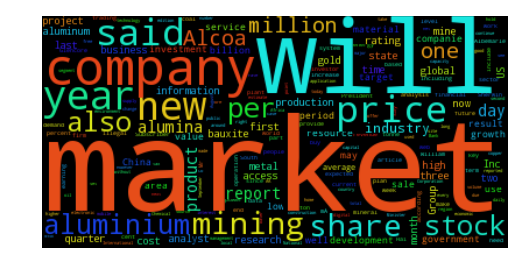

In [4]:
# Wordcloud for our documents

wordcloud = WordCloud().generate(str_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

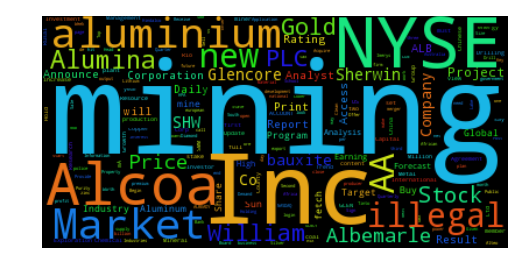

In [5]:
# Wordcloud for our titles
words = WordCloud().generate(str_title)
plt.imshow(words)
plt.axis("off")
plt.show()

In [6]:
# Printing the 20 most used words
map = Code(
"""
function() {  
    var summary = this.yandexTranslationBody;
    if (summary) { 
        // quick lowercase to normalize per your requirements
        summary = summary.toLowerCase().split(" "); 
        for (var i = summary.length - 1; i >= 0; i--) {
            // might want to remove punctuation, etc. here
            if (summary[i].length < 50)  {      // make sure there's something
               emit(summary[i], 1); // store a 1 for each word
            }
        }
    }
};
"""
)

reduce = Code(
"""
function( key, values ) {    
    var count = 0;    
    values.forEach(function(v) {            
        count +=v;    
    });
    return count;
}
"""
)

result = documents.map_reduce(map, reduce, "myresults")

In [7]:
# Getting the 100 most used words in our documents and their count
docfinal = list(result.find())
docsorted = sorted(docfinal, key=lambda x: x['value'], reverse=True)
print("We actually got {} documents with a Yandex Translation\n".format(len(bundle_list)))
print("\t\tKEY\t\tVALUE")
for words in docsorted[0:100]:
    if(len(words["_id"]) < 8):
        print("\t\t{}\t\t{}".format(words["_id"], words["value"]))
    else:
        print("\t\t{}\t{}".format(words["_id"], words["value"]))

We actually got 7545 documents with a Yandex Translation

		KEY		VALUE
		the		264238.0
		of		139489.0
		and		115742.0
		to		104487.0
		in		88922.0
		a		71650.0
		is		44470.0
		for		42251.0
		on		35738.0
		that		32908.0
		with		26232.0
		by		24490.0
		at		24232.0
		as		23642.0
		from		20440.0
		are		19181.0
		this		18357.0
		has		17834.0
		be		16544.0
		it		16142.0
		its		15146.0
		will		14941.0
		was		13980.0
		have		13678.0
		an		12817.0
		or		12321.0
		not		11123.0
		which		11097.0
		company		10922.0
		we		10726.0
		market		10095.0
		mining		9905.0
		our		8676.0
		new		8305.0
		aluminium	8041.0
		also		7848.0
		per		7614.0
		said		7614.0
		you		7436.0
				7382.0
		all		7339.0
		more		7279.0
		been		7162.0
		price		6919.0
		but		6774.0
		their		6716.0
		up		6711.0
		over		6360.0
		one		6180.0
		alcoa		6162.0
		shares		6067.0
		he		5986.0
		million		5984.0
		other		5840.0
		alumina		5837.0
		stock		5771.0
		after		5751.0
		about		5736.0
		can		5626.0
		they		5603.0
		were		5514.0
		-		